In [3]:
import os
import numpy as np
import math
import scipy.constants as const
import matplotlib.pyplot as plt
import csv

In [4]:
# Reading input files.
file1 = open('/Users/bshumberger/Documents/data/A_methylglucoside/VCD_data/Sorted.txt','r')

rs = []
cmpd = []
GFE = []
VibFreq = []
RotStr = []

for line in file1.readlines():
    col = line.split()
    rs.append(int(col[0]))
    cmpd.append(int(col[1]))
    GFE.append(float(col[2]))
    VibFreq.append(float(col[3]))
    RotStr.append(float(col[4]))

file1.close()

file2 = open('/Users/bshumberger/Documents/Data/A_methylglucoside/VCD_data/Combined_Free_Energy.txt','r')

rs2 = []
cmpd2 = []
GFE2 = []
                
for line in file2.readlines():
    col = line.split()
    rs2.append(int(col[0]))
    cmpd2.append(int(col[1]))
    GFE2.append(float(col[2]))

file2.close()

# Calculating Boltzmann populations.
convert = 2625499.6394799 # Hartees to J/mol
relative_E = np.zeros((len(cmpd2)))
Boltzmann_dist = np.zeros((len(cmpd2)))

for i in range(0,len(cmpd2)):
    relative_E[i] = (GFE2[i]-min(GFE2))*convert
    Boltzmann_dist[i] = np.exp(-relative_E[i]/(const.gas_constant*293.15))
    #print(rs2[i], '\t', cmpd2[i], '\t', GFE[i], '\t', relative_E[i], '\t', "%2.12f" % (Boltzmann_dist[i]),'\n')

Boltzmann_pop = np.zeros((len(cmpd2)))

print("RS", '\t', "CMPD", '\t', "Gibbs Free Energy (Hartrees)", '\t', "Relative Energy (J/mol)", '\t', "Boltzmann Population",'\n')
for j in range(0,len(cmpd2)):
    Boltzmann_pop[j] = Boltzmann_dist[j]/np.sum(Boltzmann_dist)
    print(rs2[j], '\t', cmpd2[j], '\t', "%2.6f" % (GFE2[j]),'\t\t\t', "%2.12f" % (relative_E[j]), '\t\t', "%2.12f" % (Boltzmann_pop[j]),'\n')

# Multiplying the rotational strength by their respective Boltzmannn populations.
Avg_RotStr = np.zeros((len(cmpd)))
for i in range(0,len(cmpd)):
    for j in range(0,len(cmpd2)):
        if GFE[i] == GFE2[j]:
            Avg_RotStr[i] += RotStr[i]*Boltzmann_pop[j]
        #print(i,'\t',j,'\t',GFE[i],'\t',GFE2[j],'\t',Avg_RotStr[i])
#print(Avg_RotStr)

# Calculating the differential molar extinction coefficient in equation 8d in "ECD Cotton Effects Approximated by the Gaussian Curve and Other Methods" by Philip J. Stephens and Nobuyuki Harada.
number_of_points = 2000
fwhm = .001

delta = float((max(VibFreq)-min(VibFreq))/number_of_points)
Incident_VibFreq = np.arange(min(VibFreq),max(VibFreq), delta)
diff_mol_ext_coeff = np.zeros((number_of_points))
Incident_VibFreq_cm1 = np.zeros((number_of_points))

for i in range(0,len(Incident_VibFreq)):
    for j in range(0,len(cmpd)):
        diff_mol_ext_coeff[i] += (1/((2.296*10**(-39))*math.sqrt(np.pi)*fwhm))*VibFreq[j]*Avg_RotStr[j]*np.exp(-((Incident_VibFreq[i]-VibFreq[j])/fwhm)**2)
    Incident_VibFreq_cm1[i] = Incident_VibFreq[i]*8065.54429 # Converting frequencies to cm-1

RS 	 CMPD 	 Gibbs Free Energy (Hartrees) 	 Relative Energy (J/mol) 	 Boltzmann Population 

1 	 1 	 -726.341935 			 2777.778618421667 		 0.154977660275 

1 	 3 	 -726.332201 			 28334.392109067470 		 0.000004330902 

1 	 4 	 -726.332058 			 28709.838557759125 		 0.000003712625 

1 	 5 	 -726.328523 			 37990.979783169751 		 0.000000082407 

1 	 6 	 -726.327967 			 39450.757582915292 		 0.000000045275 

2 	 1 	 -726.342993 			 0.000000000000 		 0.484412281149 

2 	 2 	 -726.342683 			 813.904888273250 		 0.346891091609 

2 	 3 	 -726.339679 			 8700.905805058099 		 0.013642162050 

3 	 1 	 -726.330649 			 32409.167549699421 		 0.000000813828 

3 	 2 	 -726.330062 			 33950.335838063351 		 0.000000432441 

3 	 3 	 -726.326381 			 43614.800011064181 		 0.000000008202 

3 	 4 	 -726.334600 			 22035.818474037867 		 0.000057393340 

3 	 5 	 -726.326632 			 42955.799601427636 		 0.000000010748 

3 	 6 	 -726.325798 			 45145.466300896704 		 0.000000004377 

3 	 7 	 -726.330169 			 33669.4073

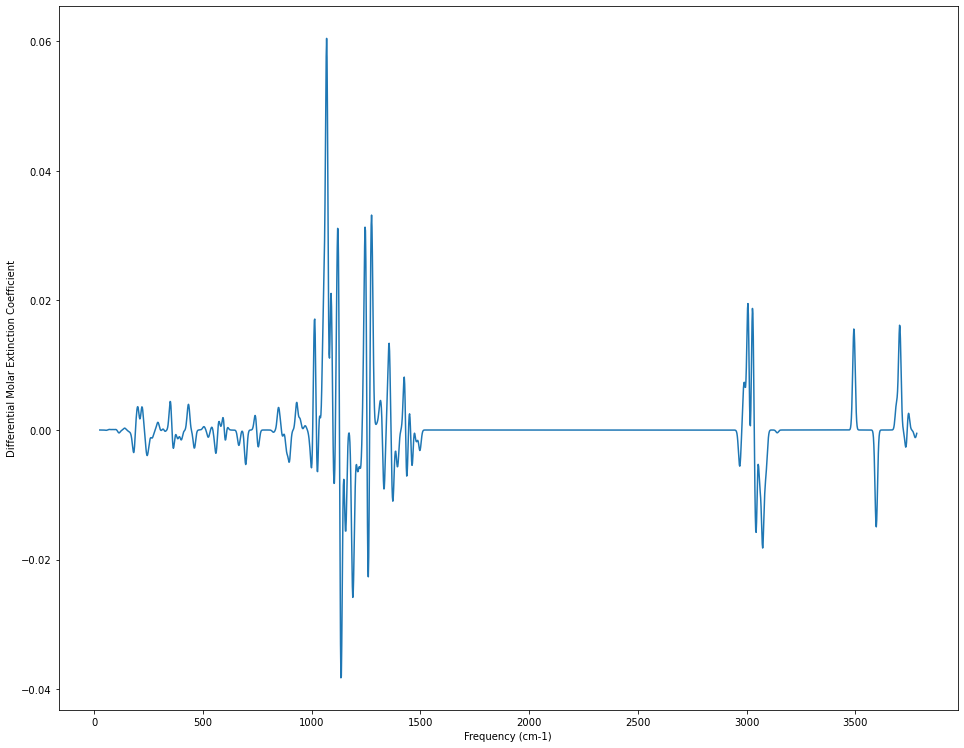

In [5]:
# Setting plot parameters.
plt.rcParams["figure.figsize"] = [13.50, 10.50]
plt.rcParams["figure.autolayout"] = True

# Selecting data to plot.
plt.plot(Incident_VibFreq_cm1, diff_mol_ext_coeff)

# Plotting the spectrum with x- and y- axis labels.
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Differential Molar Extinction Coefficient')

# Setting the limits on the x-axis.
#plt.xlim(1100,1500)

# Saving the plot.
#plt.savefig('/Users/bshumberger/Documents/Data/A_methylglucoside/Spectrum.pdf', bbox_inches='tight')

# Displaying plot.
plt.show()


In [ ]:
# Saves the data as to a .txt file.
#data = np.stack([Incident_VibFreq_cm1, diff_mol_ext_coeff], axis=1)
#np.savetxt("/Users/bshumberger/Documents/Data/A_methylglucoside/Spectral_data.txt", data, delimiter="\t")